In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re

In [2]:
data_keywords = pd.read_csv("keywords_raw.csv")

In [3]:
data_keywords

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141796,60815a84e4510cd7c8660947,Image segmentation
33141797,60815a84e4510cd7c8660947,Three-dimensional displays
33141798,60815a84e4510cd7c8660947,Roads
33141799,60815a84e4510cd7c8660947,Conferences


### Data cleaning

In [4]:
data_keywords.isna().sum()

article_id       0
keywords      3656
dtype: int64

In [5]:
def isNaN(num):
    return num != num

def clean_chevrons(text):
    if isNaN(text):
        return None
    text = str(text)
    chevrons = re.compile("<.*?>")
    return chevrons.sub('', text)

In [6]:
data_keywords.keywords = data_keywords.keywords.apply(lambda x: clean_chevrons(x))

In [8]:
data_keywords.loc[data_keywords.keywords == '', "keywords"] = np.nan

In [9]:
data_keywords.isna().sum()

article_id       0
keywords      3717
dtype: int64

In [10]:
count_not_none = data_keywords[~data_keywords.article_id.isna()].groupby('article_id').count()

In [11]:
count_not_none = count_not_none[count_not_none.keywords > 0]

In [12]:
count_not_none

,keywords
article_id,
53e99784b7602d9701f3e133,17
53e99784b7602d9701f3e151,11
53e99784b7602d9701f3e15d,33
53e99784b7602d9701f3e161,4
53e99784b7602d9701f3e4f4,10
...,...
60815a84e4510cd7c8660930,7
60815a84e4510cd7c8660939,7
60815a84e4510cd7c866093e,7


In [13]:
none_keywords = data_keywords[data_keywords.keywords.isna()]

In [15]:
to_drop = list(none_keywords.merge(count_not_none, on = 'article_id', how = 'inner').article_id)

In [16]:
len(to_drop)

401

In [17]:
# drop NaN if "artical_id" has several keywords

cleared_df = data_keywords.drop(none_keywords[none_keywords.article_id.isin(to_drop)].index)

In [18]:
cleared_df

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141796,60815a84e4510cd7c8660947,Image segmentation
33141797,60815a84e4510cd7c8660947,Three-dimensional displays
33141798,60815a84e4510cd7c8660947,Roads
33141799,60815a84e4510cd7c8660947,Conferences


In [19]:
cleared_df.isna().sum()

article_id       0
keywords      3316
dtype: int64

In [20]:
def clean(text):
    if isNaN(text) or (text is None):
        return None
    text = str(text)
    alloud = [" ", "-"]
    
    return ''.join(c for c in text if (c.isalpha()) or (c in alloud) or c.isdigit())

In [21]:
cleared_df.keywords = cleared_df.keywords.apply(lambda x: clean(x))

In [22]:
cleared_df.isna().sum()

article_id       0
keywords      3316
dtype: int64

In [23]:
len(cleared_df)

33141400

In [24]:
cleared_df = cleared_df.reset_index(drop=True)

In [25]:
cleared_df

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141395,60815a84e4510cd7c8660947,Image segmentation
33141396,60815a84e4510cd7c8660947,Three-dimensional displays
33141397,60815a84e4510cd7c8660947,Roads
33141398,60815a84e4510cd7c8660947,Conferences


In [26]:
#transform ' ' to None

for i in range(len(cleared_df)):
    if cleared_df.keywords.values[i] is None:
        continue
    if cleared_df.keywords.values[i] == '':
        cleared_df.loc[i, 'keywords'] = None
        continue
    if cleared_df.keywords.values[i][0] == ' ':
        if set(cleared_df.keywords[i]) == set(' '):
            cleared_df.loc[i, 'keywords'] = None

In [27]:
key_popularity = cleared_df.groupby('keywords').count()

In [30]:
rare_key = len(key_popularity[key_popularity.values == 1])
print(f'Number of keywords with one article id: {rare_key} ({round(rare_key/cleared_df.keywords.unique().shape[0] * 100,2)}%)')

Number of keywords with one article id: 6371905 (79.07%)


(array([7.421975e+06, 4.014490e+05, 1.499610e+05, 5.432300e+04,
        1.929600e+04, 7.280000e+03, 2.850000e+03, 1.031000e+03,
        2.970000e+02, 4.100000e+01]),
 array([ 0.        ,  1.10206271,  2.20412543,  3.30618814,  4.40825086,
         5.51031357,  6.61237629,  7.714439  ,  8.81650172,  9.91856443,
        11.02062715]),
 <BarContainer object of 10 artists>)

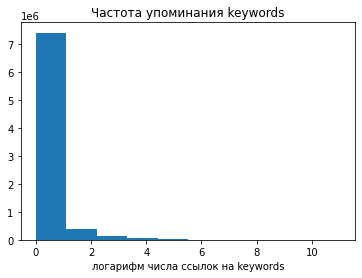

In [31]:
plt.title("Частота упоминания keywords")
plt.xlabel("логарифм числа ссылок на keywords")
plt.hist(key_popularity.article_id.apply(math.log), bins=10)

Вывод: очень много кастомных keywords

### Most popular keywords

In [48]:
key_popularity.sort_values(by=['article_id'], ascending=False)

,article_id
keywords,
data mining,61122
feature extraction,47231
computer science,44283
internet,42266
computational complexity,41765
...,...
gemination effect,1
NDVIAVHRR image time series,1
geminated consonant,1
